In [6]:
import graph_tool.all as gt
from sbm import sbm
import matplotlib.pyplot as plt
import numpy as np
import os


(ipykernel_launcher.py:20719): Gtk-WARNING **: 17:08:41.739: Locale not supported by C library.
	Using the fallback 'C' locale.


fit start
model minimized


ValueError: shape mismatch: objects cannot be broadcast to a single shape

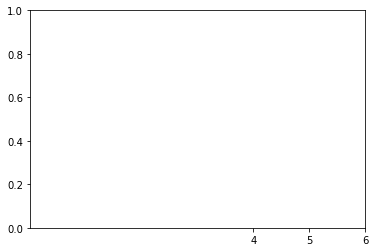

In [4]:
model = sbm()
# patient_num = 115
patient_num = 500
# patient_num = 10000
model.make_graph(patient_num=patient_num, age=True,gender=True,ethnicity=True)

experimentName = str(patient_num)+"TESTblockNUM" 
# experimentName += "NoEq"

model.setOuputLoc(experimentName)
model.save_graph()

model.fit(multilayer=True,deg_corr=True)
print("experiment "+ experimentName+ " done")

In [15]:
print(np.size(model.state.get_bs()[0]))
print(model.state.get_levels()[0].get_nonempty_B())
print(model.state.get_levels()[0].get_B())
print(model.state.get_bs()[0])

1365
4
1362
[561 561 561 ... 561 561 504]


In [7]:
g = gt.collection.data["football"]

state = gt.minimize_nested_blockmodel_dl(g,state_args=dict(base_type=gt.BlockState))

h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]



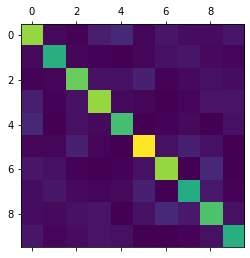

  (0, 0)	96.0
  (0, 1)	3.0
  (0, 2)	1.0
  (0, 3)	9.0
  (0, 4)	13.0
  (0, 5)	2.0
  (0, 6)	7.0
  (0, 7)	4.0
  (0, 8)	4.0
  (0, 9)	7.0
  (1, 0)	3.0
  (1, 1)	72.0
  (1, 2)	2.0
  (1, 3)	1.0
  (1, 5)	2.0
  (1, 6)	5.0
  (1, 7)	7.0
  (1, 8)	3.0
  (1, 9)	2.0
  (2, 0)	1.0
  (2, 1)	2.0
  (2, 2)	88.0
  (2, 3)	5.0
  (2, 4)	5.0
  (2, 5)	10.0
  :	:
  (7, 1)	7.0
  (7, 2)	3.0
  (7, 3)	2.0
  (7, 4)	3.0
  (7, 5)	10.0
  (7, 7)	70.0
  (7, 8)	8.0
  (7, 9)	1.0
  (8, 0)	4.0
  (8, 1)	3.0
  (8, 2)	5.0
  (8, 3)	6.0
  (8, 5)	5.0
  (8, 6)	13.0
  (8, 7)	8.0
  (8, 8)	82.0
  (8, 9)	5.0
  (9, 0)	7.0
  (9, 1)	2.0
  (9, 2)	4.0
  (9, 3)	6.0
  (9, 4)	5.0
  (9, 7)	1.0
  (9, 8)	5.0
  (9, 9)	72.0 <class 'scipy.sparse.csr.csr_matrix'>


In [13]:
# state0 = state.get_levels()[0]
# b = gt.contiguous_map(state0.get_blocks())
# state0 = state0.copy(b=b)

# e = state0.get_matrix()

# B = state0.get_nonempty_B()
# plt.matshow(e.todense()[:B, :B])

# plt.show()

# print(e,type(e))

for l, level in enumerate(state.get_levels()):
    b = gt.contiguous_map(level.get_blocks())
    level = level.copy(b=b)

    e = level.get_matrix()

    B = level.get_nonempty_B()
    df = pd.DataFrame(data=scipy.sparse.csc_matrix.todense(e))

    if not os.path.exists("/edgeCount"):
        os.makedirs("/edgeCount")
    plt.savefig('groupNumber/groupNumlevel'+str(l)+'.pdf')

    df.to_csv('edgeCount/dataLevel'+str(l)+'.csv', index=False)
    plt.matshow(e.todense()[:B, :B])
    plt.savefig("edgeCount/matrix-edge-countsLevel"+str(l)+".pdf")

    plt.show()

In [17]:
import pandas as pd
import scipy

df = pd.DataFrame(data=scipy.sparse.csc_matrix.todense(e))
df.to_csv('test.csv', index=False)

In [14]:
conda install scipy

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
